In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [6]:
# reflect the tables
station = Base.classes.station
measurement = Base.classes.measurement

In [7]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns_st = inspector.get_columns('station')
for c in columns_st:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
columns_msr = inspector.get_columns('measurement')
for c in columns_msr:
    print(c['name'], c["type"])

# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).\
    order_by((measurement.date).desc()).first()

('2017-08-23',)

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
end_date = dt.datetime(2017, 8, 23)
start_date = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
msr_lastyear = session.query(measurement).\
    filter(and_(measurement.date >= start_date, measurement.date <= end_date))

#for row in msr_lastyear:
#    print(row.id, row.station, row.date, row.prcp, row.tobs)
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ["id", "station", "date", "prcp", "tobs"]
msr_lastyear_df = pd.DataFrame([(row.id, row.station, row.date, row.prcp, row.tobs) for row in msr_lastyear],
                               columns=column_names)

# Sort the dataframe by date
msr_lastyear_df.sort_values('date')

# Print df
print(msr_lastyear_df)

         id      station        date  prcp  tobs
0      2365  USC00519397  2016-08-24  0.08  79.0
1      2366  USC00519397  2016-08-25  0.08  80.0
2      2367  USC00519397  2016-08-26  0.00  79.0
3      2368  USC00519397  2016-08-27  0.00  77.0
4      2369  USC00519397  2016-08-28  0.01  78.0
...     ...          ...         ...   ...   ...
2218  19546  USC00516128  2017-08-19  0.09  71.0
2219  19547  USC00516128  2017-08-20   NaN  78.0
2220  19548  USC00516128  2017-08-21  0.56  76.0
2221  19549  USC00516128  2017-08-22  0.50  76.0
2222  19550  USC00516128  2017-08-23  0.45  76.0

[2223 rows x 5 columns]


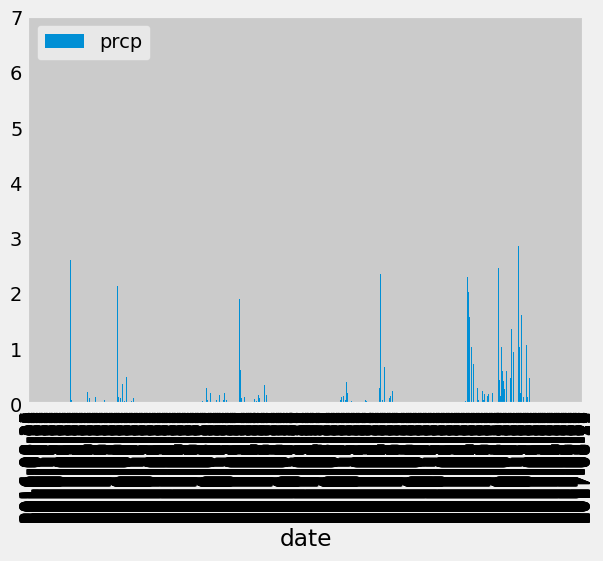

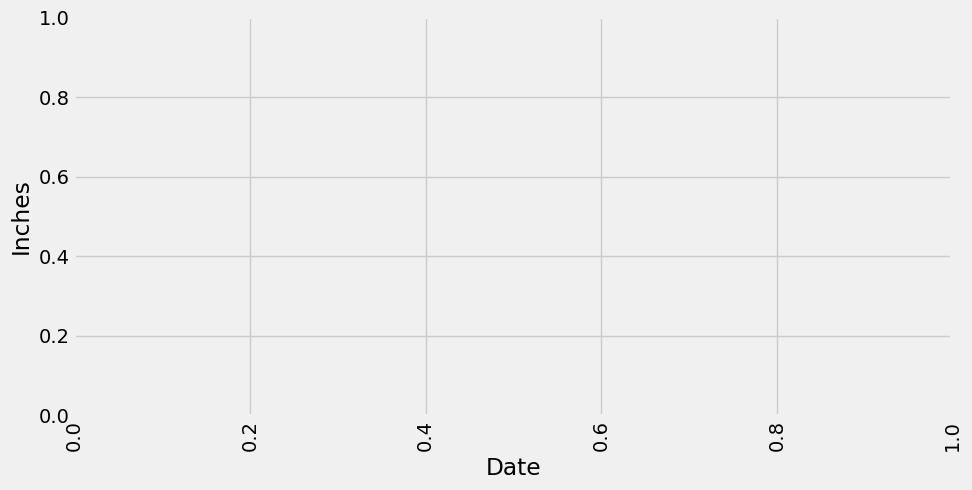

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
msr_lastyear_df.plot(x="date", y="prcp", kind="bar")
fig = plt.figure(figsize = (10, 5))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [19]:
# Close Session
session.close()